In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
plt.rcParams['figure.dpi'] = 100
plt.style.use('ggplot')

In [2]:
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')

In [3]:
df=pd.concat([train, test])

In [4]:
df.shape, train.shape, test.shape

((2919, 81), (1460, 81), (1459, 80))

Посмотрим сколько колонок не с числовыми значениями or с пропусками

In [5]:
names_of_col=df.columns.to_list()

In [6]:
obj_col=list()
for i in range(len(names_of_col)-1):# target не смотрим там есть наны тк мы объединили таблички тест и треин в одну
    if object == df[names_of_col[i]].dtypes:
        obj_col.append(names_of_col[i])

In [7]:
float_w_nan=list()
for i in range(len(names_of_col)-1):# смотрим сколько числовых колонок с пропусками
    if df[names_of_col[i]].isnull().values.sum()>0 and df[names_of_col[i]].dtypes != object:
        float_w_nan.append(names_of_col[i])

In [8]:
len(obj_col), len(float_w_nan)# 43 колонки не числовые, 11 колонки числовые с пропусками

(43, 11)

Сначала обработаем числовые колонки с пропусками

In [9]:
for i in range(len(float_w_nan)):
    print(float_w_nan[i],df[float_w_nan[i]].isnull().values.sum())
# всего у нас 2919 строчек

LotFrontage 486
MasVnrArea 23
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
GarageYrBlt 159
GarageCars 1
GarageArea 1


In [10]:
df_ultra=df.copy()

In [11]:
for i in range(len(float_w_nan)):
    df_ultra[float_w_nan[i]] = df_ultra[float_w_nan[i]].fillna(0)

In [12]:
for i in range(len(float_w_nan)):# проверим все ли пропуски обработались
    print(float_w_nan[i],df_ultra[float_w_nan[i]].isnull().values.sum())

LotFrontage 0
MasVnrArea 0
BsmtFinSF1 0
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
BsmtFullBath 0
BsmtHalfBath 0
GarageYrBlt 0
GarageCars 0
GarageArea 0


In [13]:
for i in range(len(obj_col)):# удалим колонки не числовые где пропусков больше примерно 80% от всей колонки
    if df_ultra[obj_col[i]].isnull().values.sum()>2500:
        print(obj_col[i],df_ultra[obj_col[i]].isnull().values.sum())
        df_ultra=df_ultra.drop([obj_col[i]], axis=1)

Alley 2721
PoolQC 2909
MiscFeature 2814


In [14]:
obj_col_mini=list() # запишем остав. данные в массив
for i in range(len(obj_col)):
    try:
        if df_ultra[obj_col[i]].isnull().values.sum():
            obj_col_mini.append(obj_col[i])
            print(obj_col[i],df_ultra[obj_col[i]].isnull().values.sum())
    except:
        pass

MSZoning 4
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 24
BsmtQual 81
BsmtCond 82
BsmtExposure 82
BsmtFinType1 79
BsmtFinType2 80
Electrical 1
KitchenQual 1
Functional 2
FireplaceQu 1420
GarageType 157
GarageFinish 159
GarageQual 159
GarageCond 159
Fence 2348
SaleType 1


In [15]:
len(obj_col_mini)# осталось 20 колонок с пропусками

20

In [16]:
df_ultra_v=df_ultra.copy()

In [17]:
for i in range(len(obj_col_mini)):
    meanVal = df_ultra[obj_col_mini[i]].mode()[0]
    df_ultra[obj_col_mini[i]]=df_ultra[obj_col_mini[i]].fillna(meanVal)

In [18]:
for i in range(len(obj_col)):
    try:
        if df_ultra[obj_col[i]].isnull().values.sum():
            print(obj_col[i],df_ultra[obj_col[i]].isnull().values.sum())
    except:
        pass

In [19]:
# df_dum1 = pd.get_dummies(df_ultra, sparse=True)
df_dum = pd.get_dummies(df_ultra, sparse=False)


In [20]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 281 entries, Id to SaleCondition_Partial
dtypes: float64(12), int64(26), uint8(243)
memory usage: 1.5 MB


In [21]:
# df_dum.to_csv('/content/f.csv')

In [66]:
train_clean_x=df_dum.drop('SalePrice',axis=1).iloc[:1460,:].copy()
train_clean_y=df_dum.iloc[:1460,df_dum.columns.get_loc("SalePrice"):df_dum.columns.get_loc("SalePrice")+1].copy()
test_clean_x=df_dum.drop('SalePrice',axis=1).iloc[1460:,:].copy()

In [67]:
test_clean_x

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,0,1,0


In [23]:
train_clean_y["SalePrice"] = train_clean_y['SalePrice'].apply(np.log)

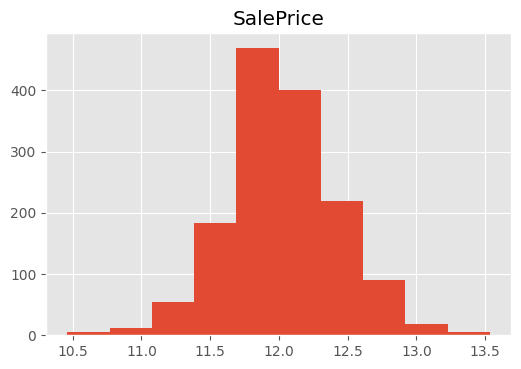

In [24]:
train_clean_y.hist();
# df_dum.iloc[:1460,df_dum.columns.get_loc("SalePrice")df_dum.columns.get_loc("SalePrice")+1].hist();

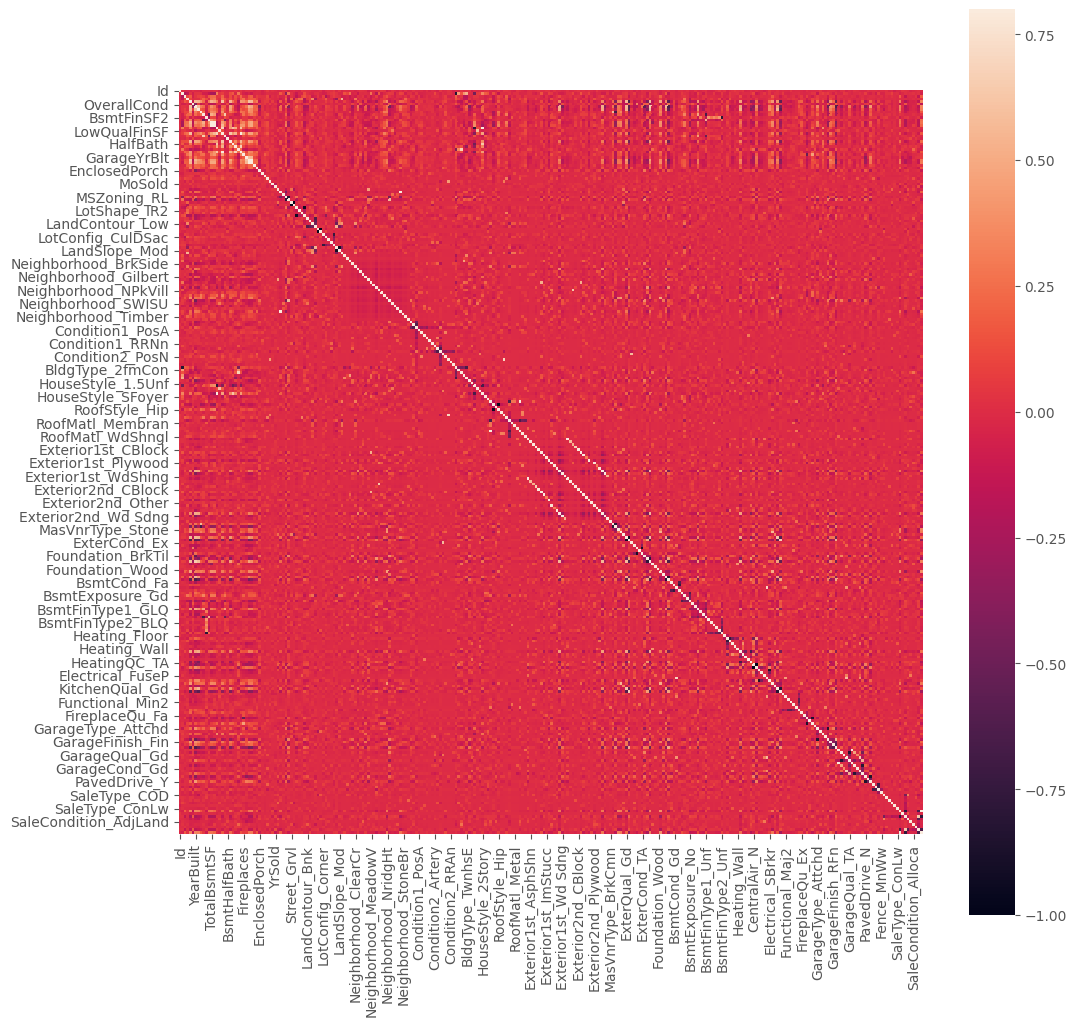

In [25]:
corrmat = train_clean_x.corr()
import seaborn as sns
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True)

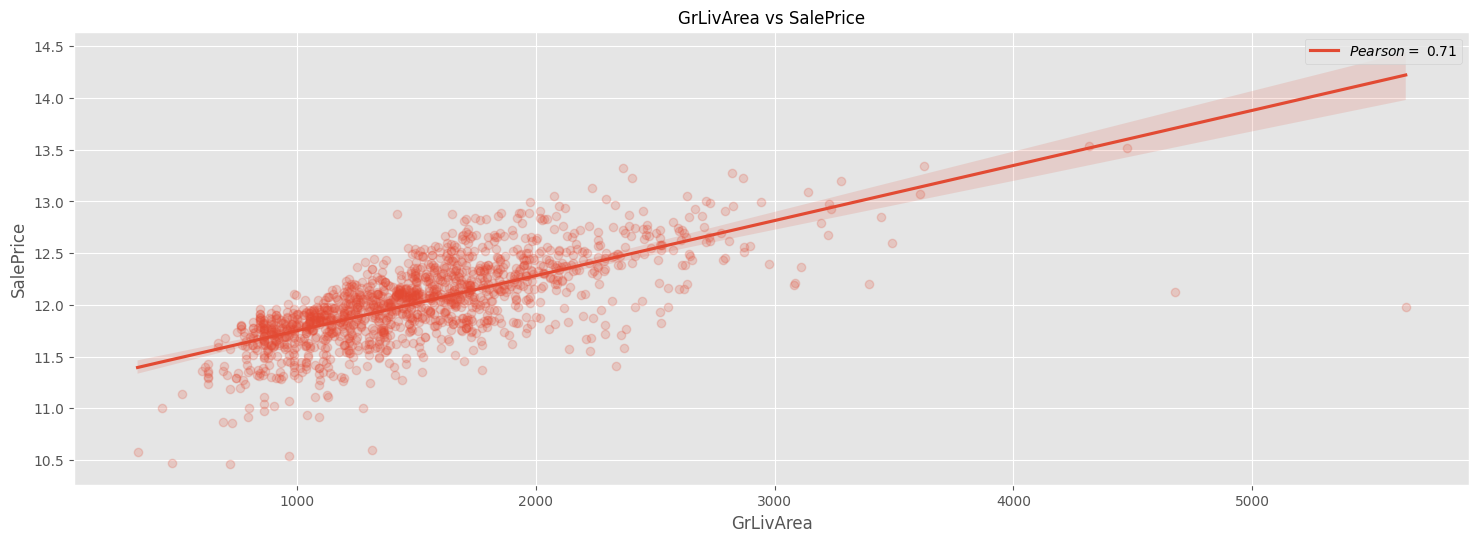

In [26]:
Pearson_GrLiv = 0.71
plt.figure(figsize = (18, 6))
sns.regplot(x = train_clean_x['GrLivArea'], y=train_clean_y, scatter_kws={'alpha':0.2})
plt.title('GrLivArea vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_GrLiv)], loc = 'best')
plt.show()

In [27]:
from xgboost                 import XGBRegressor
from catboost                import Pool
from catboost                import CatBoostRegressor
from lightgbm                import LGBMRegressor
from sklearn.svm             import SVR
from sklearn.naive_bayes     import GaussianNB
from sklearn.tree            import DecisionTreeRegressor
from mlxtend.regressor       import StackingRegressor
from sklearn.linear_model    import LinearRegression, BayesianRidge, ElasticNet, Lasso, \
                                    LassoLarsIC, Ridge, RidgeCV, LassoCV, LassoLarsCV, SGDRegressor
from sklearn.model_selection import RepeatedKFold, KFold, cross_val_score, train_test_split, \
                                    GridSearchCV, RandomizedSearchCV
from sklearn.ensemble        import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics         import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.kernel_ridge    import KernelRidge
from sklearn.pipeline        import make_pipeline
from sklearn.preprocessing   import RobustScaler, PolynomialFeatures
from sklearn.base            import BaseEstimator, TransformerMixin, RegressorMixin, clone

In [33]:
kf = KFold(n_splits=5, shuffle=True)
cv_scores, cv_std = [], []

In [34]:
def rmse(model):
    return np.sqrt(-cross_val_score(model, train_clean_x, train_clean_y.values.ravel(), scoring="neg_mean_squared_error", cv=kf))

In [35]:
def apply_learning_algorithm(model):
    score = rmse(model)
    cv_scores.append(score.mean())
    cv_std.append(score.std())

In [36]:
models = [
    Ridge(alpha = 10),
    LassoCV(alphas = [1, 0.1, 0.001, 0.0005]),
    XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1),
    LinearRegression(),                               # Linear Regression
    BayesianRidge(compute_score=True),     # Bayesian Ridge Regression
    LGBMRegressor(                         # Light Gradient Boost Regressor
                      objective='regression',
                      num_leaves=5,
                      learning_rate=0.05, 
                      n_estimators=720,
                      max_bin = 55, 
                      bagging_fraction = 0.8,
                      bagging_freq = 5, 
                      feature_fraction = 0.2319,
                      feature_fraction_seed=9, 
                      bagging_seed=9,
                      min_data_in_leaf =6, 
                      min_sum_hessian_in_leaf = 11),
    # SVR(kernel='rbf', C=1000000, epsilon=0.001),                                 # Support Vector Regression
    DecisionTreeRegressor(),               # Decision Tree Regressor
    RandomForestRegressor(n_estimators=1000),               # Random Forest Regressor
    XGBRegressor(                          # XGB Regressor
                      colsample_bytree=0.4603, 
                      gamma=0.0468, 
                      learning_rate=0.05, 
                      max_depth=3, 
                      min_child_weight=1.7817, 
                      n_estimators=2200,
                      reg_alpha=0.4640, 
                      reg_lambda=0.8571,
                      subsample=0.5213),
    GradientBoostingRegressor(             # Gradient Boost Regressor
                      n_estimators=3000, 
                      learning_rate=0.05,
                      max_depth=4, 
                      max_features='sqrt',
                      min_samples_leaf=15, 
                      min_samples_split=10, 
                      loss='huber'),
    CatBoostRegressor(),                   # Cat Boost Regressor
    StackingRegressor(                     # Stacked Regressor
                      regressors=(CatBoostRegressor(),
                                  LinearRegression(),
                                  BayesianRidge(),
                                  GradientBoostingRegressor()),
                                  meta_regressor = CatBoostRegressor(),
                                  use_features_in_secondary = True),
    make_pipeline(                         # Lasso Regression
                      RobustScaler(), 
                      Lasso(alpha =0.0005)),
    make_pipeline(                         # Elastic Net Regression
                      RobustScaler(), 
                      ElasticNet(alpha=0.0005, l1_ratio=.9)),
    KernelRidge(                           # Kernel Ridge Regression
                      alpha=0.6, 
                      kernel='polynomial', 
                      degree=2, 
                      coef0=2.5),
]

In [37]:
model_names = [
    'Ridge',
    'LassoCV', 
    'XGBRegressor.',
    'LinearRegression',
    'BayesianRidge', 
    'LGBMRegressor.',
    # 'SupportVectorRegressor', 
    'DecisionTreeRegressor',
    'RandomForestRegressor', 
    'XGBRegressor', 
    'GradientBoostingRegressor', 
    'CatBoostRegressor',
    'StackingRegressor',
    'LassoRegressor',
    'ElasticNetRegressor',
    'KernelRidgeRegressor'
]


In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
for model in models:
  apply_learning_algorithm(model)
  print(model)


Выходные данные были обрезаны до нескольких последних строк (5000).
14:	learn: 0.2458382	total: 94.2ms	remaining: 6.18s
15:	learn: 0.2385585	total: 100ms	remaining: 6.16s
16:	learn: 0.2314542	total: 106ms	remaining: 6.15s
17:	learn: 0.2253685	total: 112ms	remaining: 6.13s
18:	learn: 0.2191700	total: 119ms	remaining: 6.12s
19:	learn: 0.2123723	total: 125ms	remaining: 6.12s
20:	learn: 0.2062103	total: 132ms	remaining: 6.13s
21:	learn: 0.2009390	total: 138ms	remaining: 6.11s
22:	learn: 0.1955336	total: 144ms	remaining: 6.1s
23:	learn: 0.1901523	total: 163ms	remaining: 6.62s
24:	learn: 0.1848288	total: 170ms	remaining: 6.61s
25:	learn: 0.1795972	total: 180ms	remaining: 6.74s
26:	learn: 0.1746022	total: 186ms	remaining: 6.68s
27:	learn: 0.1697419	total: 191ms	remaining: 6.64s
28:	learn: 0.1650104	total: 203ms	remaining: 6.78s
29:	learn: 0.1604237	total: 219ms	remaining: 7.07s
30:	learn: 0.1566024	total: 225ms	remaining: 7.03s
31:	learn: 0.1527886	total: 231ms	remaining: 7s
32:	learn: 0.1490

In [40]:
final_cv_score = pd.DataFrame(model_names, columns = ['Regressors'])
final_cv_score['RMSE_mean'] = cv_scores
final_cv_score['RMSE_std'] = cv_std
final_cv_score

,Regressors,RMSE_mean,RMSE_std
0,Ridge,0.140554,0.023933
1,LassoCV,0.139197,0.034957
2,XGBRegressor.,0.126275,0.009528
3,LinearRegression,0.152627,0.023075
4,BayesianRidge,0.142284,0.031278
5,LGBMRegressor.,0.123886,0.014746
6,DecisionTreeRegressor,0.210549,0.006678
7,RandomForestRegressor,0.144579,0.010071
8,XGBRegressor,0.124632,0.005104
9,GradientBoostingRegressor,0.125248,0.016262


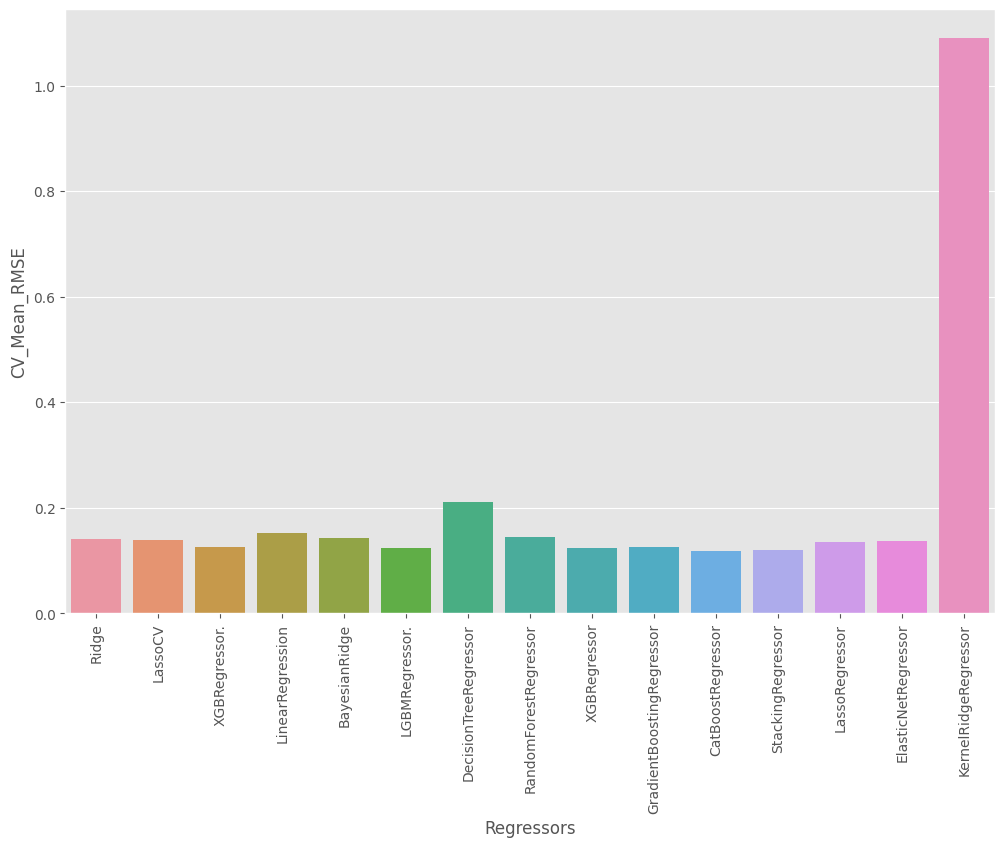

In [42]:
plt.figure(figsize = (12,8))
sns.barplot(final_cv_score['Regressors'],final_cv_score['RMSE_mean'])
plt.xlabel('Regressors', fontsize = 12)
plt.ylabel('CV_Mean_RMSE', fontsize = 12)
plt.xticks(rotation=90)
plt.show()

In [45]:
x_train, x_validation, y_train, y_validation = \
            train_test_split(train_clean_x, train_clean_y.values.ravel(), test_size = 0.1)

In [54]:
best_regressor_name = final_cv_score.sort_values(by=['RMSE_mean']).head(1)['Regressors'].iloc[0]
best_regressor = models[model_names.index(best_regressor_name)]
best_regressor

In [48]:
final_cv_score.sort_values(by=['RMSE_mean']).head()

,Regressors,RMSE_mean,RMSE_std
10,CatBoostRegressor,0.119140,0.017267
11,StackingRegressor,0.119733,0.011577
5,LGBMRegressor.,0.123886,0.014746
8,XGBRegressor,0.124632,0.005104
9,GradientBoostingRegressor,0.125248,0.016262


In [ ]:
best_model = best_regressor.fit(x_train, y_train)

In [50]:
# Creation of the RMSE metric:    
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


In [51]:
pred = best_model.predict(x_validation)
score = rmse(y_validation, pred)
score

0.11979102892749947

In [56]:
test_id=test['Id']

In [68]:
test_pred = best_model.predict(test_clean_x)
submission = pd.DataFrame(test_id, columns = ['Id'])
test_pred = np.expm1(test_pred)
submission['SalePrice'] = test_pred 
submission.head()

,Id,SalePrice
0,1461,125546.353841
1,1462,160227.465542
2,1463,189579.878698
3,1464,195859.241087
4,1465,185720.867840


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [58]:
test_clean_x

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790.0,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275.0,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49.0,...,0,0,0,1,0,0,0,0,1,0


In [70]:
submission.to_csv("/content/result.csv", index = False, header = True)